In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

import gmaps
import requests
# Import the API key.
from config import g_key


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | omsukchan
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | necochea
Processing Record 8 of Set 1 | santa rosa
Processing Record 9 of Set 1 | kongolo
Processing Record 10 of Set 1 | aklavik
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | warqla
City not found. Skipping...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | quatre cocos
Processing Record 19 of Set 1 | machala
Processing Record 20 of Set 1 | sao joao da barra
Processing Record 21 of Set 1 | halalo
City not found. Ski

Processing Record 37 of Set 4 | saint-joseph
Processing Record 38 of Set 4 | boa vista
Processing Record 39 of Set 4 | nelson bay
Processing Record 40 of Set 4 | hami
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | alugan
Processing Record 44 of Set 4 | bintulu
Processing Record 45 of Set 4 | hukuntsi
Processing Record 46 of Set 4 | vardo
Processing Record 47 of Set 4 | kruisfontein
Processing Record 48 of Set 4 | saldanha
Processing Record 49 of Set 4 | riyadh
Processing Record 50 of Set 4 | iquitos
Processing Record 1 of Set 5 | nizhniy kuranakh
Processing Record 2 of Set 5 | gangotri
City not found. Skipping...
Processing Record 3 of Set 5 | khonuu
City not found. Skipping...
Processing Record 4 of Set 5 | norman wells
Processing Record 5 of Set 5 | ishinomaki
Processing Record 6 of Set 5 | roald
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | chuy
Processing Record 9 of Set 5 | itoman
Proces

Processing Record 27 of Set 8 | tuburan
Processing Record 28 of Set 8 | berlevag
Processing Record 29 of Set 8 | kholodnyy
Processing Record 30 of Set 8 | catabola
Processing Record 31 of Set 8 | liniere
City not found. Skipping...
Processing Record 32 of Set 8 | snasa
Processing Record 33 of Set 8 | belmopan
Processing Record 34 of Set 8 | black river
Processing Record 35 of Set 8 | lagunas
Processing Record 36 of Set 8 | payo
Processing Record 37 of Set 8 | cidreira
Processing Record 38 of Set 8 | pingzhuang
Processing Record 39 of Set 8 | mopipi
Processing Record 40 of Set 8 | nandu
Processing Record 41 of Set 8 | ozernovskiy
Processing Record 42 of Set 8 | southbridge
Processing Record 43 of Set 8 | yerbogachen
Processing Record 44 of Set 8 | pyapon
Processing Record 45 of Set 8 | cobija
Processing Record 46 of Set 8 | zlitan
Processing Record 47 of Set 8 | maarianhamina
Processing Record 48 of Set 8 | iwanai
Processing Record 49 of Set 8 | kamenskoye
City not found. Skipping...
Pr

Processing Record 11 of Set 12 | hofn
Processing Record 12 of Set 12 | gatton
Processing Record 13 of Set 12 | najran
Processing Record 14 of Set 12 | sturgis
Processing Record 15 of Set 12 | fare
Processing Record 16 of Set 12 | puerto baquerizo moreno
Processing Record 17 of Set 12 | meulaboh
Processing Record 18 of Set 12 | conde
Processing Record 19 of Set 12 | petalcingo
Processing Record 20 of Set 12 | carutapera
Processing Record 21 of Set 12 | dolores
Processing Record 22 of Set 12 | yirol
City not found. Skipping...
Processing Record 23 of Set 12 | nanortalik
Processing Record 24 of Set 12 | van
Processing Record 25 of Set 12 | rybnaya sloboda
Processing Record 26 of Set 12 | saint-georges
Processing Record 27 of Set 12 | podosinovets
Processing Record 28 of Set 12 | mokhsogollokh
Processing Record 29 of Set 12 | sayyan
Processing Record 30 of Set 12 | saurimo
Processing Record 31 of Set 12 | ilhabela
Processing Record 32 of Set 12 | bacolod
Processing Record 33 of Set 12 | sa

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hamilton,39.1834,-84.5333,86.02,67,40,1.01,US,2021-06-26 17:35:28
1,Yellowknife,62.4560,-114.3525,77.56,50,20,13.80,CA,2021-06-26 17:35:29
2,Mataura,-46.1927,168.8643,45.48,96,100,2.59,NZ,2021-06-26 17:35:29
3,East London,-33.0153,27.9116,58.14,72,0,13.80,ZA,2021-06-26 17:33:49
4,Omsukchan,62.5333,155.8000,59.45,54,30,2.95,RU,2021-06-26 17:35:29
5,Albany,42.6001,-73.9662,81.30,74,100,9.46,US,2021-06-26 17:30:35
6,Necochea,-38.5473,-58.7368,53.04,54,100,13.33,AR,2021-06-26 17:35:30
7,Santa Rosa,14.3122,121.1114,84.18,83,72,2.73,PH,2021-06-26 17:33:54
8,Kongolo,-5.3833,27.0000,78.49,30,10,3.89,CD,2021-06-26 17:35:30
9,Aklavik,68.2191,-135.0107,52.63,76,90,8.05,CA,2021-06-26 17:35:31


In [8]:
new_order = ["City", "Country", 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [9]:
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hamilton,US,2021-06-26 17:35:28,39.1834,-84.5333,86.02,67,40,1.01
1,Yellowknife,CA,2021-06-26 17:35:29,62.4560,-114.3525,77.56,50,20,13.80
2,Mataura,NZ,2021-06-26 17:35:29,-46.1927,168.8643,45.48,96,100,2.59
3,East London,ZA,2021-06-26 17:33:49,-33.0153,27.9116,58.14,72,0,13.80
4,Omsukchan,RU,2021-06-26 17:35:29,62.5333,155.8000,59.45,54,30,2.95
5,Albany,US,2021-06-26 17:30:35,42.6001,-73.9662,81.30,74,100,9.46
6,Necochea,AR,2021-06-26 17:35:30,-38.5473,-58.7368,53.04,54,100,13.33
7,Santa Rosa,PH,2021-06-26 17:33:54,14.3122,121.1114,84.18,83,72,2.73
8,Kongolo,CD,2021-06-26 17:35:30,-5.3833,27.0000,78.49,30,10,3.89
9,Aklavik,CA,2021-06-26 17:35:31,68.2191,-135.0107,52.63,76,90,8.05


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

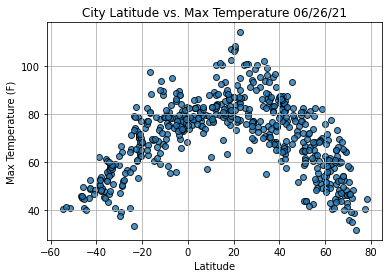

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

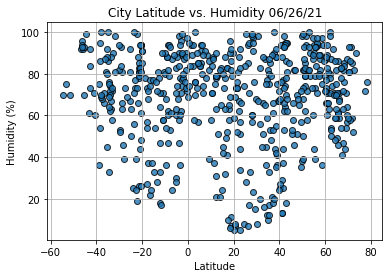

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


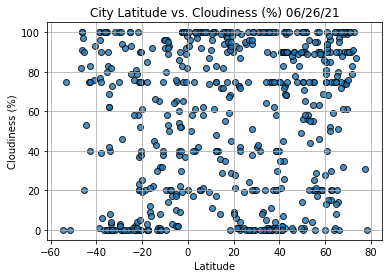

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

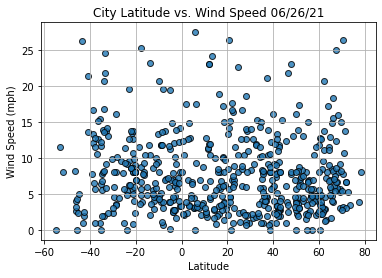

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hamilton,US,2021-06-26 17:35:28,39.1834,-84.5333,86.02,67,40,1.01
1,Yellowknife,CA,2021-06-26 17:35:29,62.4560,-114.3525,77.56,50,20,13.80
4,Omsukchan,RU,2021-06-26 17:35:29,62.5333,155.8000,59.45,54,30,2.95
5,Albany,US,2021-06-26 17:30:35,42.6001,-73.9662,81.30,74,100,9.46
7,Santa Rosa,PH,2021-06-26 17:33:54,14.3122,121.1114,84.18,83,72,2.73
...,...,...,...,...,...,...,...,...,...
557,Wilmington,US,2021-06-26 17:36:28,34.2257,-77.9447,88.93,75,75,11.50
560,Arona,ES,2021-06-26 17:38:42,28.0996,-16.6810,70.11,60,20,5.99
561,Boddam,GB,2021-06-26 17:38:42,57.4667,-1.7833,60.39,79,100,6.96
562,San Felipe,VE,2021-06-26 17:38:42,10.3399,-68.7425,83.08,71,96,3.09


In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hamilton,US,2021-06-26 17:35:28,39.1834,-84.5333,86.02,67,40,1.01
1,Yellowknife,CA,2021-06-26 17:35:29,62.4560,-114.3525,77.56,50,20,13.80
4,Omsukchan,RU,2021-06-26 17:35:29,62.5333,155.8000,59.45,54,30,2.95
5,Albany,US,2021-06-26 17:30:35,42.6001,-73.9662,81.30,74,100,9.46
7,Santa Rosa,PH,2021-06-26 17:33:54,14.3122,121.1114,84.18,83,72,2.73


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

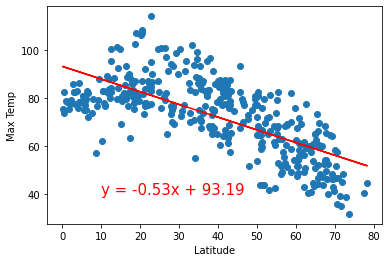

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

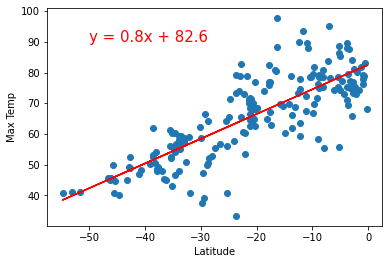

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

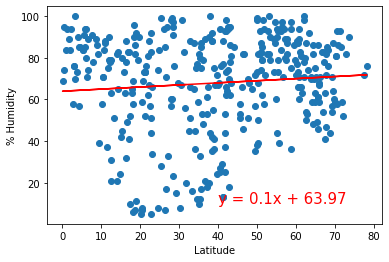

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

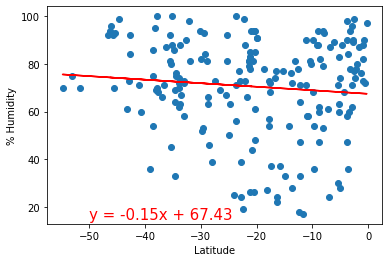

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

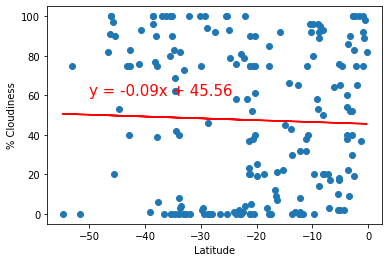

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

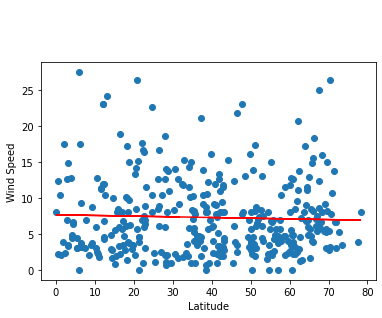

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

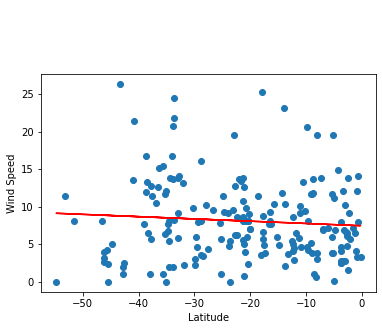

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [30]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hamilton,US,2021-06-26 17:35:28,39.1834,-84.5333,86.02,67,40,1.01
1,1,Yellowknife,CA,2021-06-26 17:35:29,62.4560,-114.3525,77.56,50,20,13.80
2,2,Mataura,NZ,2021-06-26 17:35:29,-46.1927,168.8643,45.48,96,100,2.59
3,3,East London,ZA,2021-06-26 17:33:49,-33.0153,27.9116,58.14,72,0,13.80
4,4,Omsukchan,RU,2021-06-26 17:35:29,62.5333,155.8000,59.45,54,30,2.95


In [31]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [32]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [35]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [45]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig 

Figure(layout=FigureLayout(height='420px'))

In [46]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [48]:
# Wind Speed Heatmap 
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [50]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [51]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hamilton,US,2021-06-26 17:35:28,39.1834,-84.5333,86.02,67,40,1.01
1,1,Yellowknife,CA,2021-06-26 17:35:29,62.4560,-114.3525,77.56,50,20,13.80
5,5,Albany,US,2021-06-26 17:30:35,42.6001,-73.9662,81.30,74,100,9.46
7,7,Santa Rosa,PH,2021-06-26 17:33:54,14.3122,121.1114,84.18,83,72,2.73
8,8,Kongolo,CD,2021-06-26 17:35:30,-5.3833,27.0000,78.49,30,10,3.89
12,12,Bengkulu,ID,2021-06-26 17:35:32,-3.8004,102.2655,75.20,90,60,4.16
14,14,Georgetown,MY,2021-06-26 17:31:50,5.4112,100.3354,80.89,84,20,3.00
16,16,Machala,EC,2021-06-26 17:35:33,-3.2667,-79.9667,77.31,78,90,6.91
17,17,Sao Joao Da Barra,BR,2021-06-26 17:35:34,-21.6403,-41.0511,78.89,66,58,13.42
19,19,Wukari,NG,2021-06-26 17:35:34,7.8500,9.7833,79.43,78,82,6.98


In [52]:
preferred_cities_df.count()

City_ID       213
City          213
Country       213
Date          213
Lat           213
Lng           213
Max Temp      213
Humidity      213
Cloudiness    213
Wind Speed    213
dtype: int64

In [53]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Hamilton,US,86.02,39.1834,-84.5333,
1,Yellowknife,CA,77.56,62.4560,-114.3525,
5,Albany,US,81.30,42.6001,-73.9662,
7,Santa Rosa,PH,84.18,14.3122,121.1114,
8,Kongolo,CD,78.49,-5.3833,27.0000,
12,Bengkulu,ID,75.20,-3.8004,102.2655,
14,Georgetown,MY,80.89,5.4112,100.3354,
16,Machala,EC,77.31,-3.2667,-79.9667,
17,Sao Joao Da Barra,BR,78.89,-21.6403,-41.0511,
19,Wukari,NG,79.43,7.8500,9.7833,


In [58]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [60]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Hamilton,US,86.02,39.1834,-84.5333,Six Acres Bed & Breakfast
1,Yellowknife,CA,77.56,62.4560,-114.3525,The Explorer Hotel
5,Albany,US,81.30,42.6001,-73.9662,
7,Santa Rosa,PH,84.18,14.3122,121.1114,Erlyn’s Sta Rosa City Home
8,Kongolo,CD,78.49,-5.3833,27.0000,Mustafa Zengin Büyük Çerkes Düklüğü
12,Bengkulu,ID,75.20,-3.8004,102.2655,Grage Hotel Bengkulu
14,Georgetown,MY,80.89,5.4112,100.3354,Cititel Penang
16,Machala,EC,77.31,-3.2667,-79.9667,Hotel Regal
17,Sao Joao Da Barra,BR,78.89,-21.6403,-41.0511,Pousada Porto De Canoas
19,Wukari,NG,79.43,7.8500,9.7833,Elimtop


In [62]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig


Figure(layout=FigureLayout(height='420px'))

In [64]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [65]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [66]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig


Figure(layout=FigureLayout(height='420px'))